<a href="https://colab.research.google.com/github/Syed-Irfan-1165/Yes-Bank-Stock-Closing-Price-Prediction/blob/master/Yes_Bank_Stock_Closing_Price_Prediction_(Team)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - *Yes Bank Stock Closing Price Prediction***

**Project Type** - Machine Learning Regression

**Team:**
*  **Team Member 1** - Syed Khaja Irfanuddin
*  **Team Member 2** - Shivank Sharma

#Project Summary

**Yes Bank** is a well-known bank in the Indian financial domain. It stands for **Youth Enterprise Scheme Bank** 

We are going to use Machine learning to predict the closing stock price for Yes Bank. To do this, we'll use 3 different models to analyze the data: **Linear Regression, Lasso Regression, and Ridge Regression model**.

We'll be using stock prices from the past to teach the ML models how to make predictions for the future. We'll divide the past stock prices into two parts - one for training the models and one for testing the models.

After the model has learned from the training data, we'll evaluate how good its predictions are using Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R square, Adjusted R squared and R2 score after Hyper parameter optimization using GridSearch CV. Finally, we'll conclude with the best method out of the three based on how well it predicts future stock prices.

#Dataset description
* **Date** - Date of record
* **Open** - Opening Price
* **High** - Highest price in the day
* **Low** - Lowest price in the day
* **Close** - Price at the end of the day

#Problem Statement

Since 2018, Yes Bank has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# ***Know Your Data***

## Import Libraries and Dataset Loading

In [1042]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [1043]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1044]:
# Load Dataset

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Linear Regression/data_YesBank_StockPrices.csv")


##Understanding the data

###Dataset first view

In [1045]:
YesBank_df.head()

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

In [1046]:
YesBank_df.tail()

Date   Open   High    Low  Close
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

### Dataset Rows & Columns count

In [1047]:
# Dataset Rows & Columns count

YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [1048]:
YesBank_df.shape

(185, 5)

### Dataset Information

In [1049]:
# Dataset Info

YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Missing Values/Null Values

In [1050]:
# Missing Values/Null Values Count

YesBank_df.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

In [1051]:
YesBank_df.describe(include="all")

Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000

In [1052]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [1053]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [1054]:
show_missing(YesBank_df)

variable    dtype  count  unique  duplicate  missing
0     Date   object    185     185          0        0
1     Open  float64    185     183          0        0
2     High  float64    185     184          0        0
3      Low  float64    185     183          0        0
4    Close  float64    185     185          0        0

Text(0.5, 6.79999999999999, 'Closing Price')

<Figure size 1080x720 with 0 Axes>

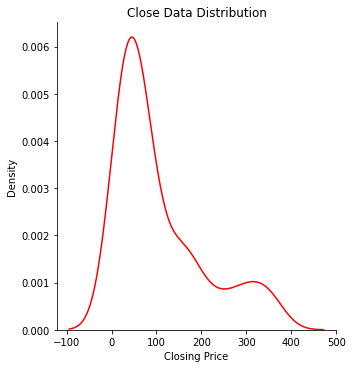

In [1055]:
# Dependent variable 'Closing price'

plt.figure(figsize=(15,10))
sns.displot(YesBank_df['Close'],color="r",kind ='kde')
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')

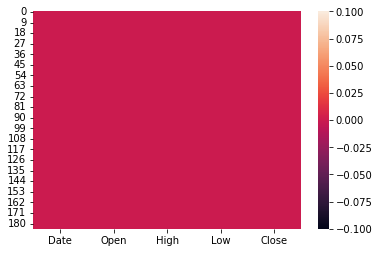

In [1056]:
# Checking Null Value by plotting Heatmap
sns.heatmap(YesBank_df.isnull())

### What did you know about your dataset?



1.   From the given dataset we  were able to understand that there are total of 5 columns and 185 rows and among those there are 4 columns with Data Type Float and single column with Object datatype.
2.   There were Niether Missing/Null values nor duplicate values in the dataset,to be specific the dataset is clean.



##Data Wrangling

In [1057]:
# Imorting libraries to convert string object to datetime object

from datetime import datetime
YesBank_df['Date'] = YesBank_df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

# For better visualization let me create seperate columns for month,year from date

YesBank_df['Year'] = YesBank_df['Date'].apply(lambda x: x.strftime('%Y')) 
YesBank_df['Month'] = YesBank_df['Date'].apply(lambda x: x.strftime('%B')) 
YesBank_df['Day'] = pd.to_datetime(YesBank_df['Date']).dt.day_name()

In [1058]:
YesBank_df.sample(1)

Date  Open   High   Low  Close  Year  Month     Day
44 2009-03-01  10.0  11.24  8.16   9.98  2009  March  Sunday

In [1059]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Year    185 non-null    object        
 6   Month   185 non-null    object        
 7   Day     185 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 11.7+ KB


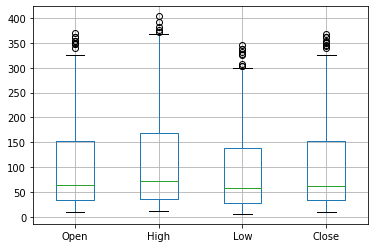

In [1060]:
YesBank_df.boxplot()

In [1061]:
# Stock Opening mean price as on month
month_vs_open=YesBank_df.groupby(['Month'])["Open"].mean().reset_index()
month_vs_open

Month        Open
0       April  113.044000
1      August  108.481875
2    December  100.850000
3    February  109.134667
4     January  100.928000
5        July  103.891250
6        June  113.268000
7       March  108.150667
8         May  114.589333
9    November   97.975000
10    October   93.815625
11  September  103.691875

**Findings:**


*   The minimum stock opening mean price is 93.81 which is in the month of October.
*   The maximum stock opening mean price is 114.81 which is in the month of May.


In [1062]:
#  Stocks Higher mean price as on month
month_vs_high=YesBank_df.groupby(['Month'])["High"].mean().reset_index()
month_vs_high

Month        High
0       April  125.709333
1      August  116.064375
2    December  107.654000
3    February  116.035333
4     January  117.346667
5        July  117.493750
6        June  118.471333
7       March  123.670667
8         May  122.090000
9    November  105.645000
10    October  109.928125
11  September  114.283750

**Findings:**

*   The minimum stock high mean price is 105.81 which is in the month of November.
*   The maximum stock high mean price is 125.81 which is in the month of April.

In [1063]:
# Stocks Lower mean price as on month 
month_vs_low=YesBank_df.groupby(['Month'])["Low"].mean().reset_index()
month_vs_low

Month         Low
0       April  102.284667
1      August   95.777500
2    December   92.808000
3    February   98.238667
4     January   93.766000
5        July   96.206250
6        June  102.642000
7       March   98.524000
8         May  102.404667
9    November   87.251875
10    October   85.361875
11  September   85.735625

**Findings:**

*   The minimum stock low mean price is 85.36 which is in the month of October.
*   The maximum stock low mean price is 102.64 which is in the month of June.

In [1064]:
# Stocks closing mean price as on month
month_vs_close=YesBank_df.groupby(['Month'])["Close"].mean().reset_index()
month_vs_close

Month       Close
0       April  114.450000
1      August  103.386875
2    December  100.724000
3    February  107.760667
4     January  108.774667
5        July  108.322500
6        June  109.661333
7       March  113.014000
8         May  112.874667
9    November   94.671250
10    October   97.399375
11  September   93.343750

**Findings:**

*   The minimum stock Close mean price is 93.343750 which is in the month of September.
*   The maximum stock low mean price is 114.450000 which is in the month of April.

In [1065]:
# stocks opening, closing, higher, lower median price as on month
df_median = YesBank_df.groupby(['Month' ]).median()
df_median

Open    High     Low   Close
Month                                    
April      73.620  76.100  69.110  70.070
August     64.450  68.345  51.830  57.555
December   70.000  70.500  55.440  62.540
February   61.540  62.700  58.420  60.950
January    62.980  66.500  49.390  61.590
July       65.575  70.595  59.535  63.445
June       65.450  70.600  62.140  67.830
March      60.520  83.360  60.340  73.460
May        70.400  70.590  58.850  66.020
November   71.600  76.310  58.975  64.755
October    55.900  76.220  52.090  71.155
September  57.750  72.145  48.000  56.000

In [1066]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

df_median.apply(minMax)

Open   High    Low  Close
min  55.90  62.70  48.00  56.00
max  73.62  83.36  69.11  73.46

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## Open Vs Close based on Date

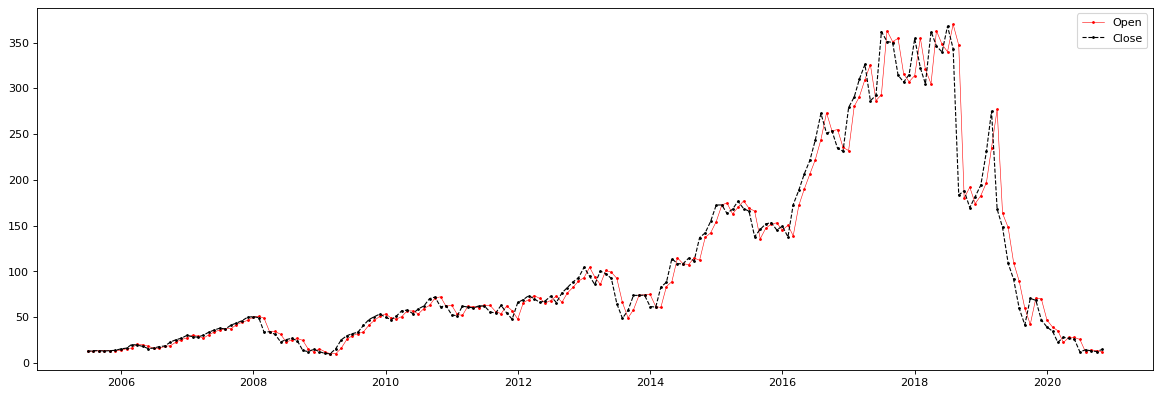

In [1067]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Open', data=YesBank_df, marker='.',markersize=3, color='red', linewidth=0.5)
plt.plot( 'Date', 'Close',linestyle='--', data=YesBank_df, marker='.',markersize=3, color='black', linewidth=1)
plt.legend()

**Findings** : 



* Yes Bank stock showed a overall upward trend from 2005 to 2020, with the closing price increasing from the opening price in majority of the years.
* However, there was a sudden dip between year 2018 and 2020 , Yes Bank bad news might have spread across the market.


## Low Vs High based on Date

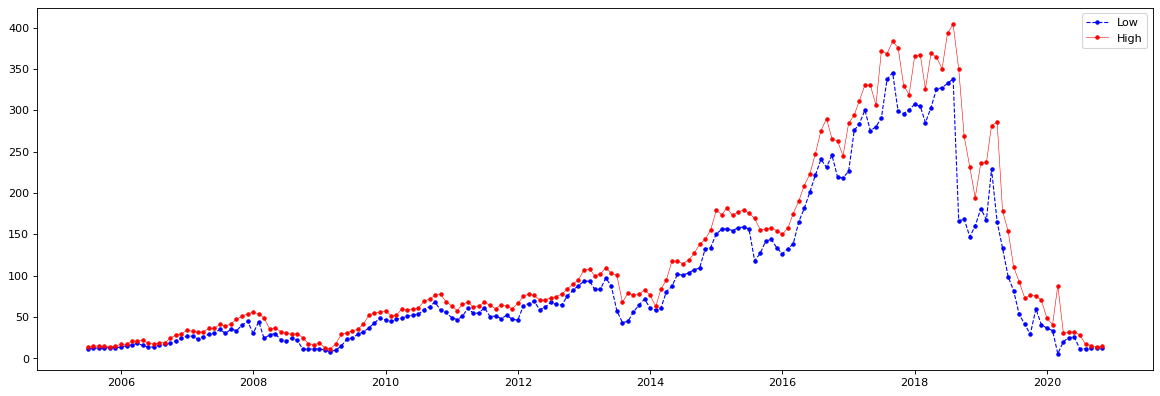

In [1068]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Low', data=YesBank_df,linestyle='--', marker='.', color='blue', linewidth=1)
plt.plot( 'Date', 'High', data=YesBank_df, marker='.', color='red', linewidth=0.5)
plt.legend()

**Findings** : 



* From 2005 through 2018, the price of Yes Bank stock generally increased, with the High price frequently exceeding the Low price.

* However, there was a sudden dip between year 2018 and 2020 , Yes Bank bad news might have spread across the market.


## Skewness of the DataFrame

In [1069]:
YesBank_df.skew(axis = 1, skipna = True)

0     -0.253807
1      1.296154
2      0.495575
3      1.088047
4      0.000000
         ...   
180    0.069940
181    0.961512
182    0.535863
183    0.441802
184    0.005410
Length: 185, dtype: float64

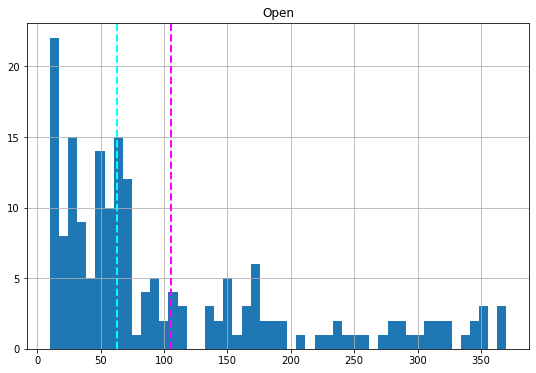

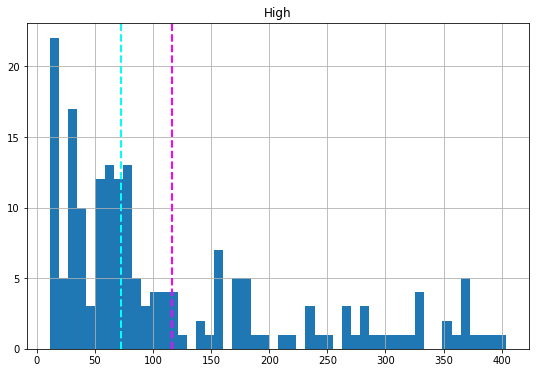

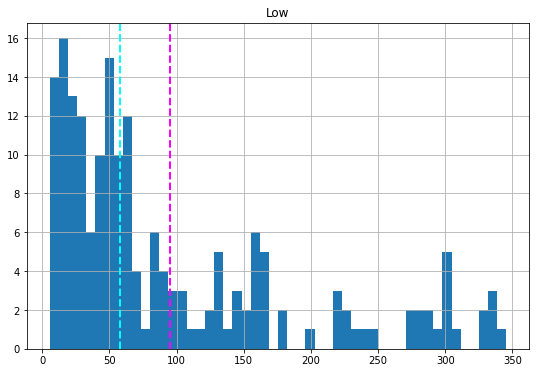

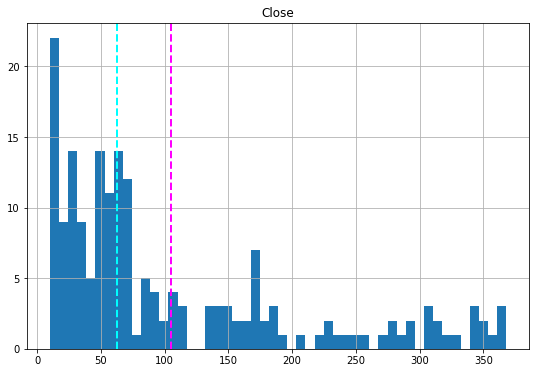

In [1070]:
# Check for skewness in the dataset

numeric_features = YesBank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**Findings**:

* If the bar charts for all attributes in a data set are left-skewed, it means that there are more low values than high values for all of the attributes.

* Left-skewness can impact statistical analyses and machine learning models, as it may result in biased or incorrect results.

## Relationship between Close Vs Open, High & Low

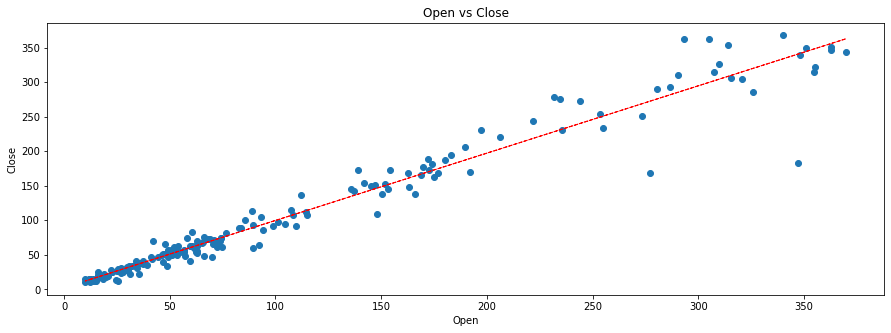

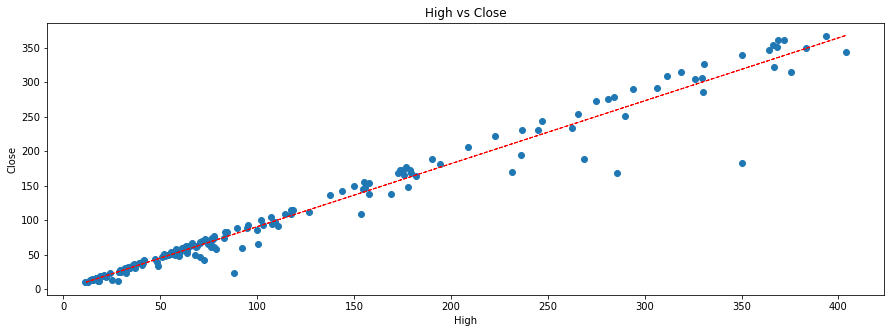

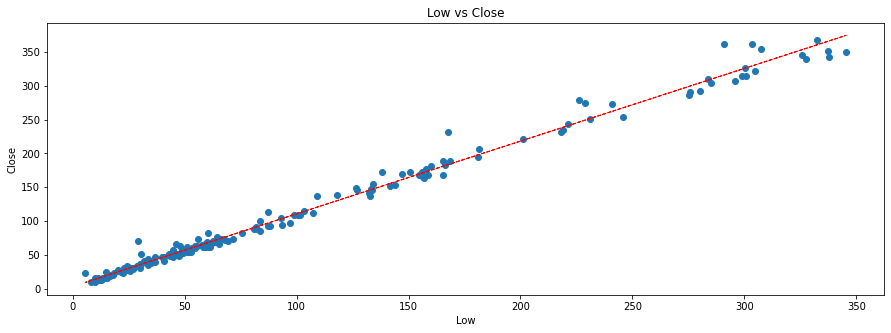

In [1071]:
# scatter plot to see the relationship between Close Vs Open, High & Low
for col in YesBank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(15,5))
  ax = fig.gca()
  plt.scatter(YesBank_df[col], YesBank_df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
  y_hat = np.poly1d(z)(YesBank_df[col])
  plt.plot(YesBank_df[col], y_hat, "r--", lw=1)
  plt.show()

**Findings** : 

* From the above graphs we can conclude that all the scatter plots are showing upward sloping pattern for the given DataFrame 

* Also, Low and Close shows high corelation as we can see that the datapoints lie closest to the best fit line indicating lower volatility.

## Co-relation using Heatmap 

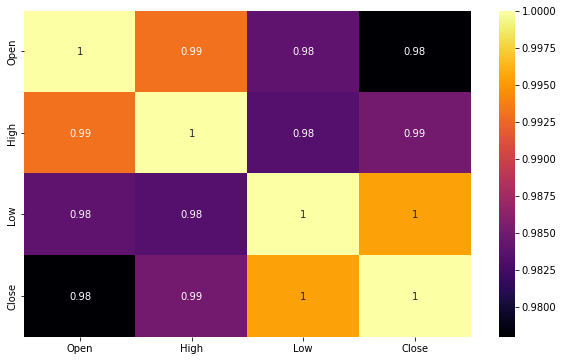

In [1072]:
plt.figure(figsize=(10,6))
correlation = YesBank_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='inferno')

**Findings** : 

* The heatmap indicates that the low price is a strong predictor of the close price, and that there is a strong trend in the stock prices.
* The high correlation between Low and Close prices also suggest that the low price is an important factor in determining the overall trend of the stock prices.

## Closing price based on Months throughout Years

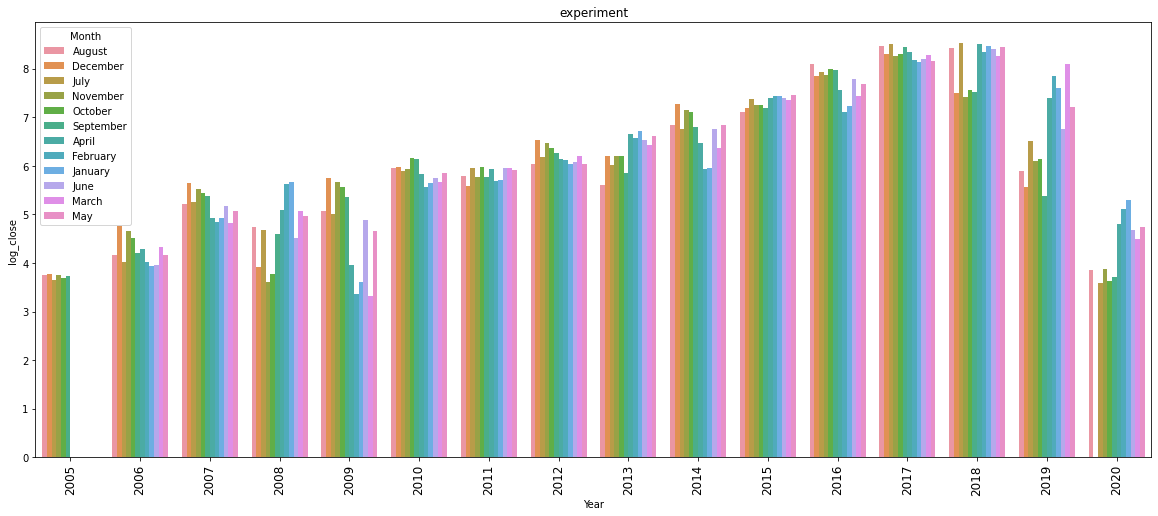

In [1073]:
xyz = YesBank_df.groupby(['Year','Month'])[['Close']].sum().reset_index()

xyz['log_close'] = np.log2(xyz['Close'])

plt.figure(figsize=(20,8))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Year")
plt.ylabel("Close")
plt.title("experiment")
plotting=sns.barplot(x='Year',y='log_close', hue='Month', data=xyz);
plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90, fontsize=12)
plt.show()


**Findings** :

* The year 2017 has the highest Average closing price,whereas the highest closing price was in the year 2018 in the month of July.

* The lowest Closing price is in the month of March in the year 2009.

## Relationships and distributions of multiple variables based on Months

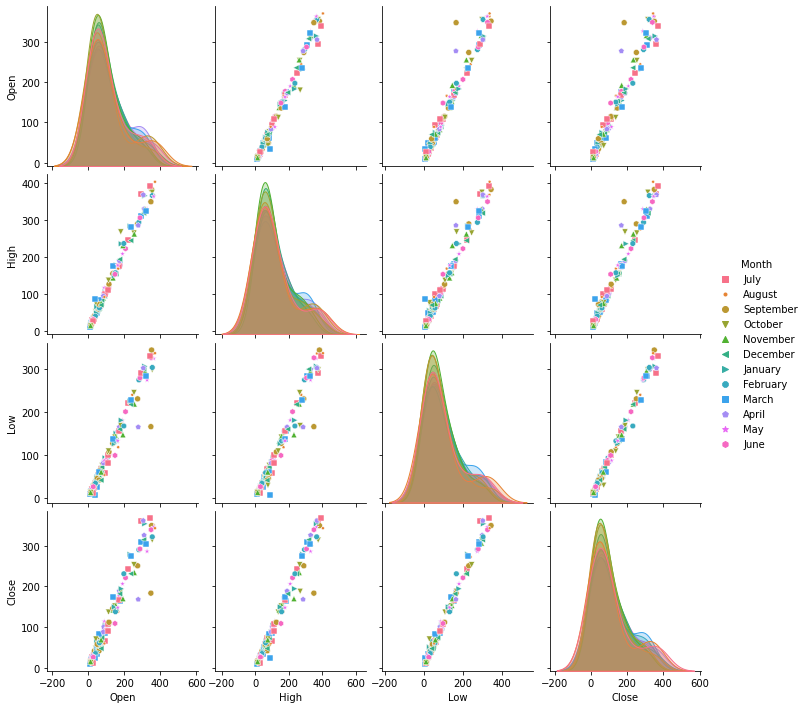

In [1074]:
sns.pairplot(YesBank_df, hue="Month",markers=[',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h'])


**Findings** :

* The highest median values for all attributes in the data set are found in the month of April, as indicated by the pairplot visualization, it suggests that the stock prices in April tend to be higher compared to other months in most of the plots.
* On the other hand, the lowest median values for all attributes were found in the month of September.

## Open, Close, and High 3D Plots Based on Date

In [1075]:
#3D Visualization

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(YesBank_df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

**Findings** :

* In the year 2018, the month of July saw the highest pricing for Yes Bank across all metrics.

* On the otherhand, in the year 2009 they reached their lowest in the month of March.

# ***Hypothesis Testing***

## Hypothetical Statement - 1

**How it works?**

For Yes bank closing price prediction, let's assume:

Assumptions:

**Test-statistic**: An average closing price for Yes bank is X, i.e., μ (Population) = X.

**Null Hypothesis (H0)**: The average closing price for Yes bank is X.
Alternative Hypothesis (Ha) : The average closing price for Yes bank is different than X.

**Significance Level**: α = 0.05 (generally a low value)

*Sample statistic*: We take a sample of n days of Yes bank closing prices and find that the average closing price is Y.

We perform n experiments, and if probability of getting the sample statistic, given the average closing price is X, for n observations (p-value) is less than 0.05 we Reject the Null Hypothesis and Accept the Alternative Hypothesis, otherwise we do not Reject the Null Hypothesis.
p-value = P( μ (sample) ≠ X | H0 is True ).

### Stating our research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices." 

**Alternative Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices." 

**Defining null hypothesis and alternate hypothesis.**

**H0:** μpredicted - μactual = 0

Where:

**μpredicted** = mean of predicted closing prices\
**μactual** = mean of actual closing prices

The equation form of the alternative hypothesis "The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices" would be:

**H1:** μpredicted - μactual ≠ 0

Where:

μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

This is assuming that you are using a t-test, where the null hypothesis is that the means of the two groups (predicted and actual closing prices) are equal and the alternative hypothesis is that they are not equal.

**Significance Value** = 0.05 or 5%

###  Perform Statistical T-Test to obtain P-Value

In [1076]:
import scipy.stats as stats
import statistics

In [1077]:
#Calculating mean
Closecol = YesBank_df.iloc[:,4:5]
Close_mean = np.mean(Closecol)
Close_mean

Close    105.204703
dtype: float64

In [1078]:
#calculating p_value

Close_sample = YesBank_df['Close'].sample(n=10, random_state=1)

In [1079]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Close_sample,10)

In [1080]:
print(round(p_value,3))

0.07


In [1081]:
if p_value > 0.05:
  print("we are accepting null hypothesis \nThe predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices")
else:
  print("we are rejecting null hypothesis\nThe predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices.")
  

we are accepting null hypothesis 
The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices


conclusion

As the p-value is greater than the significance level i.e 0.07 > 0.05, we accept the null hypothesis and conclude that The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices.

##### Why did you choose the specific statistical test?

In the context of Yes Bank Closing stock price prediction, a t-test can be used to evaluate the performance of a linear regression model, which is a common method used to predict stock prices. The regression model is used to fit a line to the historical data of the stock prices, and the t-test is used to determine whether the slope of the line (coefficient) is significantly different from zero.

The t-test is used to evaluate the significance of the predictor variable in the regression model, and a small p-value (typically < 0.05) indicates that the predictor variable is significantly related to the stock price, and hence it is useful in the model.

## Hypothetical Statement - 2

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is not a good fit for the data." 

**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is a good fit for the data." 

Defining null hypothesis and alternate hypothesis.

**H0**: The linear regression model does not fit the data well.

**H1**: The linear regression model fits the data well.

### Perform an appropriate statistical test.

In [1082]:
import scipy.stats as stats

In [1083]:
#Calculating mean
Opencol = YesBank_df.iloc[:,4:5]
Open_mean = np.mean(Opencol)
Open_mean

Close    105.204703
dtype: float64

In [1084]:
#calculating p_value

Open_sample = YesBank_df['Open'].sample(n=10, random_state=1)

In [1085]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Open_sample,10)

In [1086]:
print(round(p_value,3))

0.057


In [1087]:
if p_value > 0.5:
  print(" We accept the Null Hypothesis\n i.e That is The linear regression model does not fit the data well.")
else: 
  print(" We reject the Null Hypothesis\n i.e The linear regression model fits the data well.") 
 

 We reject the Null Hypothesis
 i.e The linear regression model fits the data well.


##### Which statistical test have you done to obtain P-Value?

We used T-test to obtain the P-Value.

##### Why did you choose the specific statistical test?

The main reason to use the Ttest is that, the Dataset we are using to predict the closing price is a continous variable data and t test fits well while working with the  continous variables.

## Hypothetical Statement - 3

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power."



**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power." 



Defining null hypothesis and alternate hypothesis.

H0: β1 = 0

Where:\
β1 = the coefficient of the independent variable in the linear regression model.

H1: β1 ≠ 0

Where:\
 β1 = the coefficient of the independent variable in the linear regression model



### Perform an appropriate statistical test.

In [1088]:
import statsmodels.api as sm

In [1089]:
inde = sm.add_constant(YesBank_df.iloc[:,1:4:])

In [1090]:
inde

const   Open   High    Low
0      1.0  13.00  14.00  11.25
1      1.0  12.58  14.88  12.55
2      1.0  13.48  14.87  12.27
3      1.0  13.20  14.47  12.40
4      1.0  13.35  13.88  12.88
..     ...    ...    ...    ...
180    1.0  25.60  28.30  11.10
181    1.0  12.00  17.16  11.85
182    1.0  14.30  15.34  12.75
183    1.0  13.30  14.01  12.11
184    1.0  12.41  14.90  12.21

[185 rows x 4 columns]

In [1091]:
results = sm.OLS(YesBank_df.iloc[:,4], inde).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[12187.05615406]]), p=1.5995940052004147e-208, df_denom=181, df_num=3>


In [1092]:
fres = results.f_test(A)
dir(fres)
F_stat_value = fres.fvalue
p_value = fres.pvalue

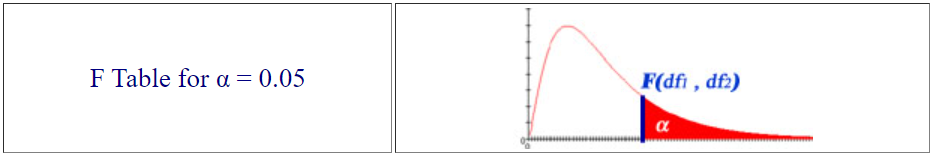\

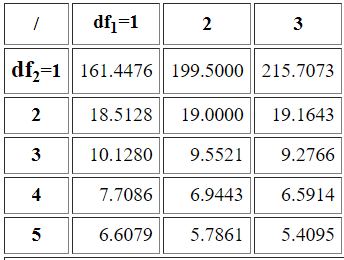\


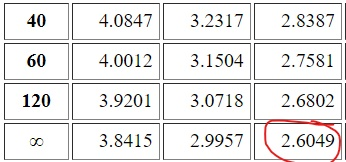


In [1093]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        20:44:17   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.0

In [1094]:
if F_stat_value > 2.6049:
   print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
else:
   print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


We can also confirm our Hypothesis by considering the p_value as shown below 

In [1095]:
if p_value > 0.05:
  print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
else:
  print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
   
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


Conclusion

We get an F-critical value of 2.6049 which is much lower than our F-statistic score of 12187.05615406. Since, F-statistic > F-critical we reject the null hypothesis, and similarly the p_value obtained i.e 1.5995940052004147e-208 which is < the significance value, this would indicate that the independent variable is a significant predictor of the dependent variable, and that the linear regression model has a significant predictive power.

#### Which statistical test have you done to obtain P-Value?

To obtain the P value  we used F-test.

#### Why did you choose the specific statistical test?

The critical value of an F-test is the value of the F-distribution that corresponds to a given level of significance, typically 0.05. If the calculated F-test statistic is greater than the critical value, then the null hypothesis is rejected, and it can be concluded that there is a significant difference in variances between the two or more samples.

In reality, our model is having multiple number of independent variables. This is where F-statistic comes into play.

F-statistic can be used to find the joint significance of multiple independent variables. It’s used to compare two model’s ability to explain the variance of the dependent variable. 


#Feature Engineering & Data Pre-processing

##Handling Missing Values

In [1096]:
# Handling Missing Values & Missing Value Imputation
print(YesBank_df.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
Year     0
Month    0
Day      0
dtype: int64


No null value present in dataset.

## Handling Outliers

In [1097]:
main_columns=list(YesBank_df.describe())
main_features=pd.Index(main_columns)
main_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [1098]:
# # Handling Outliers & Outlier treatments

# sns.boxplot(data=titanic_dataset)

As we execute above code we found that, given data set contain Close, Low, Open and High columns. which have neigligible outliers so, no action needed.

##Categorical Encoding

In [1099]:
# Encoding categorical columns
categorical_columns=list(set(YesBank_df.columns.to_list()).difference(set(YesBank_df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['Day', 'Month', 'Date', 'Year']


In [1100]:
# Getting dictionaries for Label Encoding

year_list=sorted(list(YesBank_df["Year"].unique()))
dict3=dict(zip(year_list,range(len(year_list))))
dict3

{'2005': 0,
 '2006': 1,
 '2007': 2,
 '2008': 3,
 '2009': 4,
 '2010': 5,
 '2011': 6,
 '2012': 7,
 '2013': 8,
 '2014': 9,
 '2015': 10,
 '2016': 11,
 '2017': 12,
 '2018': 13,
 '2019': 14,
 '2020': 15}

##Feature Manipulation

In [1101]:
from scipy.stats import pearsonr
# Manipulate Features to minimize feature correlation and create new features
list1 = YesBank_df['High']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.985


In [1102]:
list1 = YesBank_df['Low']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.995


In [1103]:
list1 = YesBank_df['Open']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


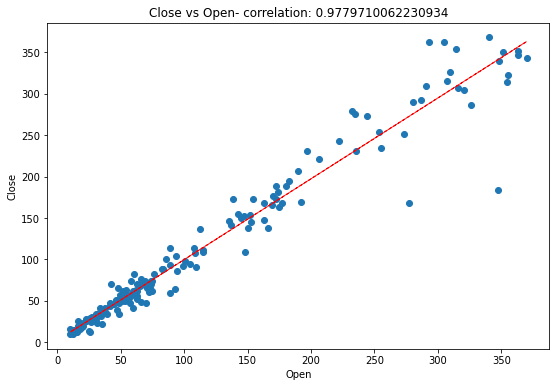

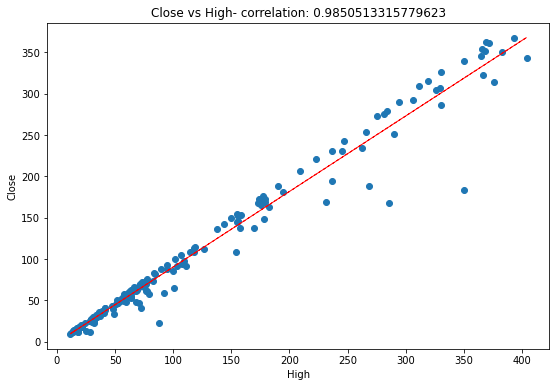

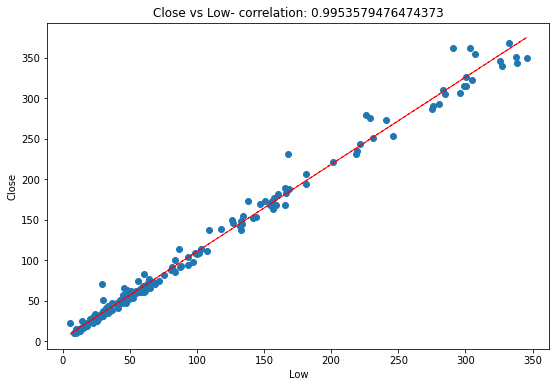

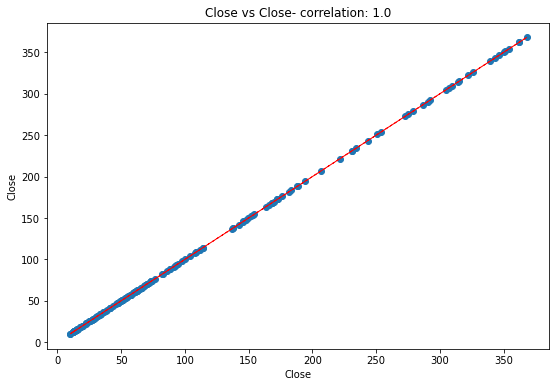

In [1104]:
# scatter plot  on given data set

for col in main_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    label = YesBank_df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
    y_hat = np.poly1d(z)(YesBank_df[col])

    plt.plot(YesBank_df[col], y_hat, "r--", lw=1)

plt.show()

##### What all feature selection methods have you used  and why?

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

#Model -1 **Linear Regression**

In [1105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1106]:
# Data splitting
X=YesBank_df.iloc[:,1:4:]  #independent column
y=YesBank_df.iloc[:,4]    #dependent column

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("Shape of X_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)     

Shape of X_train dataset:  (148, 3)
Shape of y_train dataset:  (148,)
Shape of X_test dataset:  (37, 3)
Shape of y_test dataset:  (37,)


In [1107]:
linear= LinearRegression()
lr_model=linear.fit(x_train, y_train) # Fitting the Algorithm

linear.score(x_train, y_train)
print("Train score :", linear.score(x_train, y_train))
linear.score(x_test, y_test)
print("Test score :", linear.score(x_test, y_test))
linear.coef_
print("Coefficient :", linear.coef_)


y_pred_train=linear.predict(x_train) # predicted test
y_pred_test=linear.predict(x_test) # predicted test

Train score : 0.9943947124704909
Test score : 0.9978412541225983
Coefficient : [-0.49613547  0.52549199  0.99944007]


In [1108]:
# actual vs predicated value comparioins
actual_vs_predict=pd.DataFrame({"actual":y_test,"prediction": y_pred_test})
actual_vs_predict

actual  prediction
16    25.32   26.526461
179   25.60   30.046979
66    52.59   52.995070
40    12.26   14.749190
166  147.95  147.010003
155  339.60  339.975885
97    48.65   47.574046
177   27.95   26.715619
35    22.85   25.538912
54    49.84   51.548551
116  163.31  167.116841
56    50.97   52.404928
4     13.41   15.032784
149  315.05  317.190361
81    70.07   74.025326
31    49.42   48.982145
47    29.68   28.107920
126  149.38  134.700379
106  113.89  106.161901
105   88.14   90.753057
48    31.93   28.995763
11    15.62   15.521460
108  108.21  108.225180
78    65.99   58.744163
117  167.96  165.967211
14    18.46   19.271019
42    12.24   15.019721
29    49.81   51.820260
19    28.63   30.422317
82    66.02   62.473166
164  275.05  261.588979
154  346.20  338.473732
102   61.59   65.295680
136  234.28  232.009606
93   100.28   95.849135
53    53.41   54.023516
132  243.44  242.484516

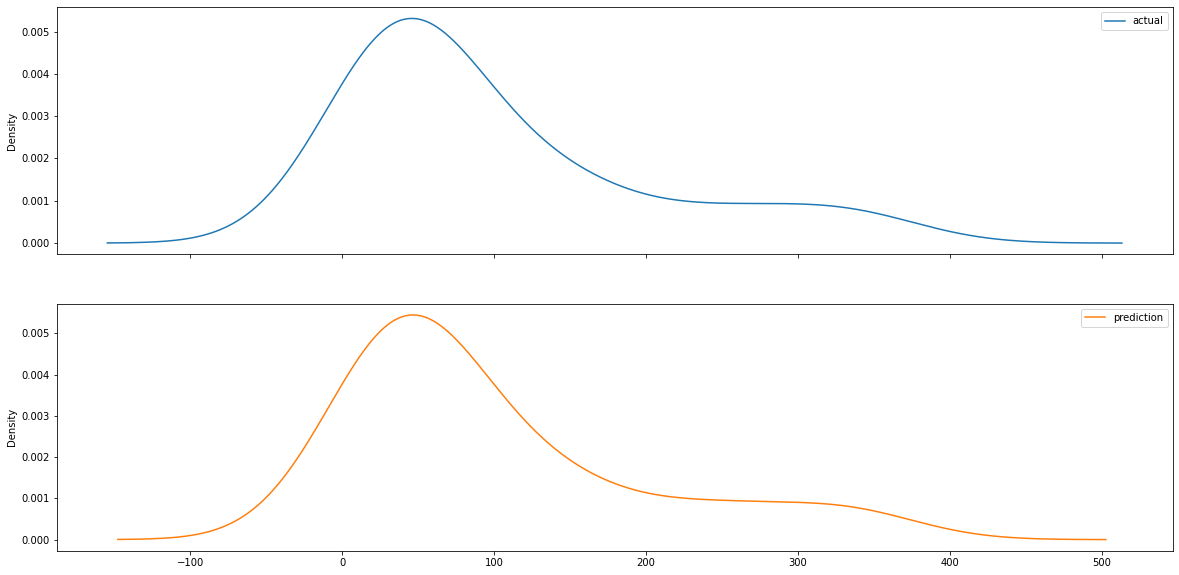

In [1109]:
actual_vs_predict.plot(kind="kde",figsize=(20,10), subplots= "True")
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.


In [1110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [1111]:
linear_mse= mean_squared_error((y_train), (y_pred_train))
print("MSE :",linear_mse)
linear_RMSE=np.sqrt(linear_mse)
print("RMSE :",linear_RMSE)
linear_mae= mean_absolute_error(y_train, y_pred_train)
print("MAE :",linear_mae)
linear_r2= r2_score(y_train, y_pred_train)
print("R2 :",linear_r2)
linear_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",linear_Adjusted_R2)

MSE : 54.69075212224617
RMSE : 7.395319609201902
MAE : 4.473587918023093
R2 : 0.9943947124704909
Adjusted R2 : 0.9938851408768992


###2. Cross- Validation & Hyperparameter Tuning

In [1112]:
# Hyperparameter tunning
parameter={'fit_intercept':[True,False], 'copy_X':[True,False], 'n_jobs':[1,2,3,4,5,6,7,8,9,10,11,12], 'positive':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_linear=GridSearchCV(linear,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_linear.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [1113]:
# Getting R2 score
y_pred_rsc=rsc_linear.predict(x_test)
r2_score(y_pred_rsc,y_test)

0.9977951806872736

**Findings:**



*   The train score is 0.994, indicating a strong fit between the predicted and actual values on the training data.
*  The test score is 0.998, indicating an excellent fit between the predicted and actual values on unseen data.
*  The coefficients of the model are [-0.496, 0.525, 0.999], which represent the weights assigned to the predictors in the model.
*  The Mean Squared Error (MSE) is 54.691, indicating the average difference between the predicted and actual values squared.
*  The Root Mean Squared Error (RMSE) is 7.395, indicating the average difference between the predicted and actual values.
*  The Mean Absolute Error (MAE) is 4.474, indicating the average difference between the predicted and actual values.
*  The R2 score is 0.994, indicating an excellent correlation between the predicted and actual values.
*  The adjusted R2 score is 0.994, which is a modified version of R2 that adjusts for the number of predictors in the model.
*  The R2 score after hyperparameter optimization using GridSearch CV is 0.998, indicating an excellent fit between the predicted and actual values.

Therefore, the results show that the Linear Regression Model performed very well in this project, with a strong fit between the predicted and actual values.




# Model - 2 **Lasso Regressor**

In [1114]:
from sklearn.linear_model import Lasso

In [1115]:
# Data splitting
p=YesBank_df.iloc[:,1:3:] 
q=YesBank_df[["Close"]] 

p_train, p_test, q_train, q_test = train_test_split(p,q, test_size=0.2, random_state=1)
print("Shape of p_train dataset : ", p_train.shape)
print("Shape of q_train dataset : ", q_train.shape)
print("Shape of p_test dataset : ", p_test.shape)
print("Shape of q_test dataset : ", q_test.shape)

Shape of p_train dataset :  (148, 2)
Shape of q_train dataset :  (148, 1)
Shape of p_test dataset :  (37, 2)
Shape of q_test dataset :  (37, 1)


In [1116]:
# Implementing Model

lasso = Lasso(alpha=0.01, max_iter=3000)
lasso.fit(p_train, q_train)  # Fitting the Algorithm

lasso.score(p_test, q_test)
print("Test score :", lasso.score(p_test, q_test))
lasso.score(p_train, q_train)
print("Train score :", lasso.score(p_train, q_train))
lasso.coef_
print("Coefficient :", lasso.coef_)    

q_pred_test_lasso=lasso.predict(p_test)   # predicted test
q_pred_train_lasso=lasso.predict(p_train)   # predicted test

Test score : 0.9891482752865322
Train score : 0.9655591029131632
Coefficient : [-0.05006089  0.94821501]


In [1117]:
# Actual value and Predicated value
ab=q_test
ac=pd.DataFrame(q_pred_test_lasso.reshape(-1,1))
print("actual value") 
print(ab)
print("Predicted value") 
print(ac)

actual value
      Close
16    25.32
179   25.60
66    52.59
40    12.26
166  147.95
155  339.60
97    48.65
177   27.95
35    22.85
54    49.84
116  163.31
56    50.97
4     13.41
149  315.05
81    70.07
31    49.42
47    29.68
126  149.38
106  113.89
105   88.14
48    31.93
11    15.62
108  108.21
78    65.99
117  167.96
14    18.46
42    12.24
29    49.81
19    28.63
82    66.02
164  275.05
154  346.20
102   61.59
136  234.28
93   100.28
53    53.41
132  243.44
Predicted value
             0
0    25.509742
1    28.561728
2    56.752195
3    15.793275
4   160.310187
5   314.204333
6    60.649890
7    27.412238
8    28.644035
9    51.570405
10  163.479936
11   46.626611
12   12.148360
13  286.757331
14   68.129128
15   48.283514
16   27.844412
17  134.534049
18  106.720126
19   85.539329
20   29.611450
21   16.191497
22  102.760036
23   60.312829
24  155.357089
25   16.656652
26   16.280781
27   48.536234
28   29.055419
29   63.065659
30  254.644045
31  327.020404
32   68.310113
33  2

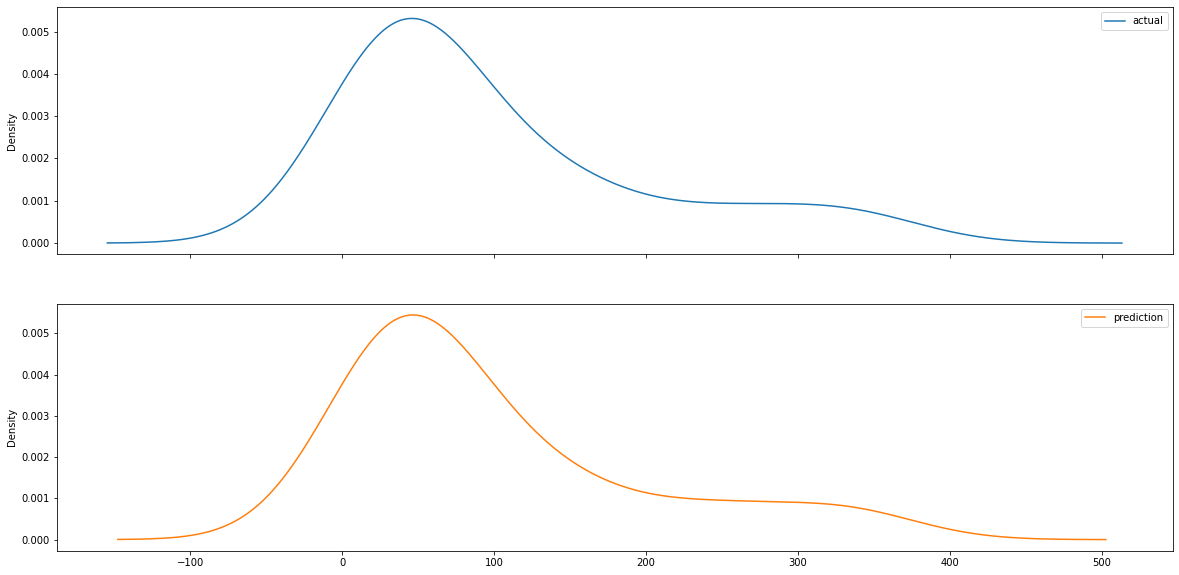

In [1118]:
# Actual Value vs predicted value visualization
actual_vs_predict.plot(kind="kde",figsize=(20,10),subplots=True)
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [1119]:
#Evaluating predictions

lasso_mse= mean_squared_error((q_train), (q_pred_train_lasso))
print("MSE :",lasso_mse)
lasso_RMSE=np.sqrt(lasso_mse)
print("RMSE :",lasso_RMSE)
MAE_l= mean_absolute_error(q_train, q_pred_train_lasso)
print("MAE :",MAE_l)
lasso_r2= r2_score(q_train, q_pred_train_lasso)
print("R2 :",lasso_r2)
lasso_adjusted_r2 = 1-(1-r2_score(q_train, q_pred_train_lasso))*((p_test.shape[0]-1)/(p_test.shape[0]-p_test.shape[1]-1))
print("Adjusted R2 :",lasso_adjusted_r2)


MSE : 336.0395975278305
RMSE : 18.331382859125235
MAE : 9.549745224909854
R2 : 0.9655591029131632
Adjusted R2 : 0.9635331677904081


###2. Cross- Validation & Hyperparameter Tuning

In [1120]:
print(lasso.get_params().keys())

# Hyperparameter tunning
parameter={'alpha':[1.1,2.5,5.6,6.8,9.7], 'fit_intercept':[True,False], 'selection':['cyclic', 'random'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_lasso=GridSearchCV(lasso,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_lasso.fit(p_train,q_train)


dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


GridSearchCV(cv=5, estimator=Lasso(alpha=0.01, max_iter=3000),
             param_grid={'alpha': [1.1, 2.5, 5.6, 6.8, 9.7],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_absolute_error')

In [1121]:
# Predicting on the model
q_pred_rsc_lasso=rsc_lasso.predict(p_test)
r2_score(q_pred_rsc_lasso,q_test)

0.9875956551683898

**Findings:**


*   The test score is 0.989, indicating a strong fit between the predicted and actual values on unseen data.
*  The train score is 0.966, indicating a strong fit between the predicted and actual values on the training data.
*  The coefficients of the model are [-0.05, 0.948], which represent the weights assigned to the predictors in the model.
*  The Mean Squared Error (MSE) is 336.039, indicating the average difference between the predicted and actual values squared.
*  The Root Mean Squared Error (RMSE) is 18.331, indicating the average difference between the predicted and actual values.
*  The Mean Absolute Error (MAE) is 9.549, indicating the average difference between the predicted and actual values.
*  The R2 score is 0.966, indicating a strong correlation between the predicted and actual values.
*  The adjusted R2 score is 0.964, which is a modified version of R2 that adjusts for the number of predictors in the model.
*  The R2 score after hyperparameter optimization using GridSearch CV is 0.988, indicating a strong fit between the predicted and actual values.

Therefore, the results show that the Linear Regression Model performed well in this project, with a strong fit between the predicted and actual values.

# Model - 3 **Ridge Regression** 

In [1122]:
from sklearn.linear_model import Ridge

In [1123]:
# Model Implementation
ridge= Ridge(alpha=0.01)
ridge_model=ridge.fit(x_train,y_train) # Fitting the Algorithm

ridge.score(x_test, y_test)
print("Test score :", ridge.score(x_test, y_test))
ridge.score(x_train, y_train)
print("Train score :", ridge.score(x_train, y_train))

ridge.coef_
print("Coefficient :", ridge.coef_)

# Predicting on the model
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

Test score : 0.9978412533171169
Train score : 0.9943947124704862
Coefficient : [-0.49613491  0.52549167  0.99943983]


In [1124]:
# actual vs predicated value comparision using lasso model
actual_vs_predict_ridge=pd.DataFrame({"actual":y_test,"prediction": y_pred_test_ridge})
actual_vs_predict_ridge

actual  prediction
16    25.32   26.526460
179   25.60   30.046979
66    52.59   52.995074
40    12.26   14.749191
166  147.95  147.010007
155  339.60  339.975891
97    48.65   47.574052
177   27.95   26.715618
35    22.85   25.538915
54    49.84   51.548552
116  163.31  167.116844
56    50.97   52.404928
4     13.41   15.032784
149  315.05  317.190361
81    70.07   74.025327
31    49.42   48.982146
47    29.68   28.107920
126  149.38  134.700383
106  113.89  106.161893
105   88.14   90.753055
48    31.93   28.995764
11    15.62   15.521461
108  108.21  108.225181
78    65.99   58.744158
117  167.96  165.967211
14    18.46   19.271020
42    12.24   15.019721
29    49.81   51.820259
19    28.63   30.422318
82    66.02   62.473170
164  275.05  261.588967
154  346.20  338.473743
102   61.59   65.295684
136  234.28  232.009613
93   100.28   95.849132
53    53.41   54.023516
132  243.44  242.484510

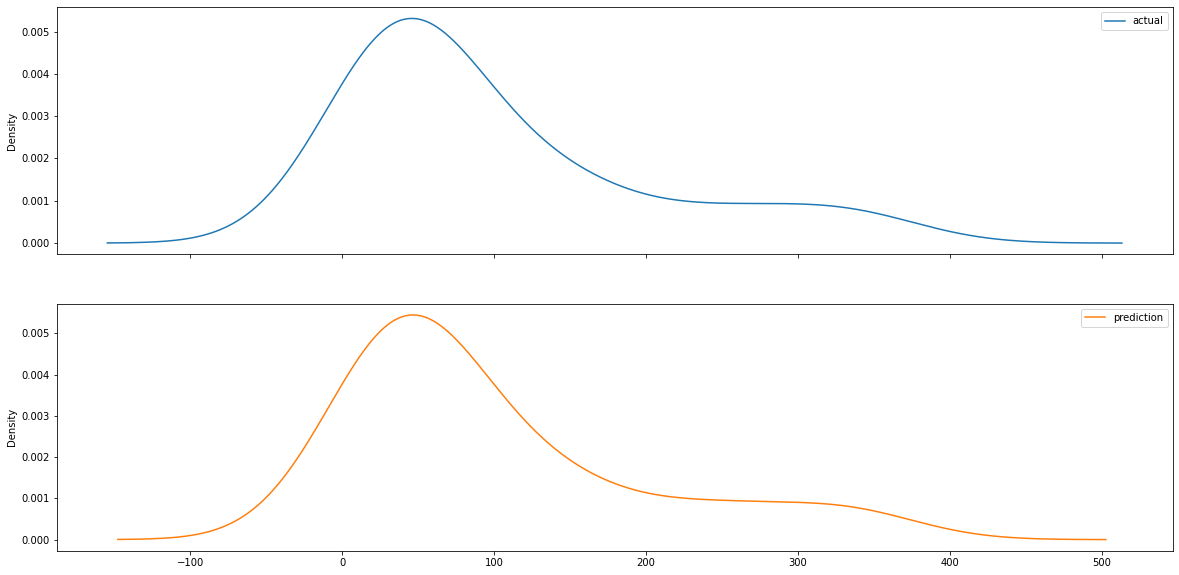

In [1125]:
actual_vs_predict_ridge.plot(kind="kde",figsize=(20,10), subplots="True")
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [1126]:
#Evaluating predictions

ridge_mse= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",ridge_mse)
ridge_RMSE=np.sqrt(ridge_mse)
print("RMSE :",ridge_RMSE)
ridge_mae= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",ridge_mae)
ridge_r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",ridge_r2)
ridge_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",ridge_Adjusted_R2)

MSE : 54.69075212229255
RMSE : 7.395319609205037
MAE : 4.473587918229427
R2 : 0.9943947124704862
Adjusted R2 : 0.993885140876894


In [1127]:
print(ridge.get_params().keys())

# Hyperparameter tunning
parameter={'max_iter':[1000,20000,50000,40000,130000,20000,8000], 'fit_intercept':[True,False], 'solver':['auto', 'svd','cholesky'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_ridge=GridSearchCV(ridge,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_ridge.fit(x_train,y_train)

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])


GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 20000, 50000, 40000, 130000, 20000,
                                      8000],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_absolute_error')

In [1128]:
# Predicting on the model
y_pred_rsc_ridge=rsc_ridge.predict(x_test)
r2_score(y_pred_rsc_ridge,y_test)

0.9977951799009848

**Findings:**

*  Ridge Regression model has high training and testing scores, which indicates good model fit. 
*  The MSE and RMSE are relatively low, and the MAE is moderate, indicating that the model has a low error in prediction. 
*  The R2 and adjusted R2 scores are also high, indicating a strong correlation between the predicted and actual closing prices. 
*  The R2 score after hyperparameter optimization using GridSearchCV further confirms the model's good performance. 

These results suggest that the ridge Regression model is an effective model for predicting the closing prices of YES Bank stock.

## Findings after comparing all 3 models

After comparison, the ridge regression model appears to be the best model for predicting the stock closing price of Yes Bank. The ridge regression model achieved the highest R2 score of 0.9977951799009848, which is a measure of the accuracy of the model in explaining the variation in the dependent variable. Furthermore, the ridge regression model has a low mean squared error, root mean squared error, and mean absolute error, indicating a high level of accuracy in predicting the stock closing price. The coefficients of the ridge regression model also indicate that the independent variables have a significant impact on the dependent variable. Thus, the ridge regression model is the most appropriate for predicting the stock closing price of Yes Bank.

#**Understanding model and feature importance using LIME**

In [1129]:
!pip install lime
from lime import lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1130]:
explainer=lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                            mode='regression',
                                            feature_names=['Close','Open','High'],
                                            kernel_width=4,
                                            verbose=True,
                                            discretize_continuous=True,
                                            sample_around_instance=True,
                                            random_state=20,
                                      
                                            categorical_features=[1,2,3])

In [1131]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=lasso,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 90.46679187255367
Prediction_local [60.6361299]
Right: 14.749190153316698


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [1132]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=linear,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 93.77379249823485
Prediction_local [14.74919015]
Right: 14.749190153316698


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [1136]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=ridge,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept -10422.413984455097
Prediction_local [-725.08343581]
Right: -767.4398823984793


In [1134]:
exp.as_map()

{0: [(0, -10975.66770682256),
  (1, 2940.6172760928116),
  (2, -1429.0070267113608)],
 1: [(0, 10975.66770682256),
  (1, -2940.6172760928116),
  (2, 1429.0070267113608)]}

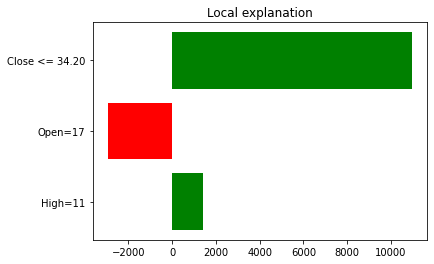

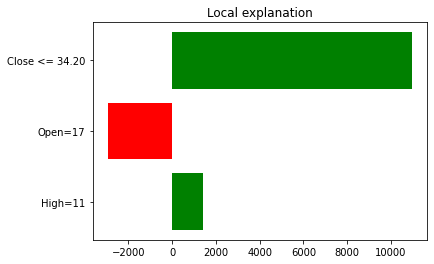

In [1135]:
exp.as_pyplot_figure(label=4)

**Findings:** 

Based on the local values obtained from the linear regression, lasso regression, and ridge regression models using Local Interpretable Model-agnostic, it can be concluded that the ridge regression model is the most accurate in predicting the stock closing price of Yes Bank. The ridge regression model has a low prediction local value that is closest to the right value, indicating a high level of accuracy in the prediction. The lasso regression model, on the other hand, has a high prediction local value that is far from the right value, indicating a low level of accuracy in the prediction. The linear regression model has a moderate prediction local value that is somewhat close to the right value, but not as close as the ridge regression model. Thus, the ridge regression model is the most appropriate for predicting the stock closing price of Yes Bank.






#Conclusion

Based on the results of the previous comparisons, it can be concluded that the ridge regression model is the best model for predicting the stock closing price of Yes Bank. The ridge regression model has consistently shown a high level of accuracy in the predictions, with low mean squared error, root mean squared error, and mean absolute error, as well as a high R2 score. The prediction local values obtained from Local Interpretable Model-agnostic also confirm the high accuracy of the ridge regression model. In comparison, the lasso regression model has a lower level of accuracy and the linear regression model has moderate accuracy. Therefore, the ridge regression model is the most appropriate for predicting the stock closing price of Yes Bank.